# Introduction:

In this project, our objective was to perform sentiment analysis on a given text corpus. Sentiment analysis, a subfield of natural language processing, is a valuable tool for understanding and categorizing emotions, attitudes, and opinions expressed in text data. We aimed to uncover the sentiment trends within the text, categorizing words into three main groups: positive, negative, and neutral. This analysis would provide us with insights into the overall emotional tone of the text and could be applied in various real-world scenarios, such as customer feedback analysis, social media monitoring, and market research.

# **PM modi's Reply on discussion to No-Confidence Motion in LokSabha**
10 Aug 2023

### 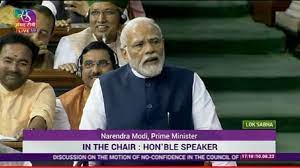

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go

import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud

nltk.download('punkt')
nltk.download("stopwords")
nltk.download("vader_lexicon")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
file_path="speech.txt"
with open(file_path,"r",encoding="utf-8") as file:
  speech_text=file.read()

In [ ]:
file_path

'speech.txt'

In [ ]:
speech_text

'“I have come to express immense gratitude towards each and every citizen of India for repeatedly showing their trust in the government”\n\n“Many key legislations did not get the discussion they deserved as the opposition put politics above them”\n\n“This time period of the 21st century will impact the country for the next thousand years. We all should have a single focus”\n\n“We have given the youth of India a government free of scams”\n\n“Today a trust has arisen in the heart of the poor to fulfill his dreams”\n\n“Opposition is not able to see the trust of people as they are so steeped in distrust”\n\n“In 2028, when you will bring a No Confidence Motion, the Country will be among the top 3”\n\n“Opposition believes in changing names but they can’t change their work culture”\n\n“Freedom fighters and founding fathers of the country always opposed dynasty politics”\n\n“Crimes against women are unacceptable and the Central Government and the State Government will work to ensure that the g

In [ ]:
speech_text_cleaned =re.sub(r'[^\w\s]','',speech_text)
speech_text_cleaned = speech_text_cleaned.lower()
words=word_tokenize(speech_text_cleaned)
stop_words=set(stopwords.words('english'))
word_filtered = [word for word in words if word not in stop_words ]
word_filtered

['come',
 'express',
 'immense',
 'gratitude',
 'towards',
 'every',
 'citizen',
 'india',
 'repeatedly',
 'showing',
 'trust',
 'government',
 'many',
 'key',
 'legislations',
 'get',
 'discussion',
 'deserved',
 'opposition',
 'put',
 'politics',
 'time',
 'period',
 '21st',
 'century',
 'impact',
 'country',
 'next',
 'thousand',
 'years',
 'single',
 'focus',
 'given',
 'youth',
 'india',
 'government',
 'free',
 'scams',
 'today',
 'trust',
 'arisen',
 'heart',
 'poor',
 'fulfill',
 'dreams',
 'opposition',
 'able',
 'see',
 'trust',
 'people',
 'steeped',
 'distrust',
 '2028',
 'bring',
 'confidence',
 'motion',
 'country',
 'among',
 'top',
 '3',
 'opposition',
 'believes',
 'changing',
 'names',
 'cant',
 'change',
 'work',
 'culture',
 'freedom',
 'fighters',
 'founding',
 'fathers',
 'country',
 'always',
 'opposed',
 'dynasty',
 'politics',
 'crimes',
 'women',
 'unacceptable',
 'central',
 'government',
 'state',
 'government',
 'work',
 'ensure',
 'guilty',
 'punished',
 '

In [ ]:
set(stopwords.words('english'))

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [ ]:
# LEMMATIZATION

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
lemmatizer =WordNetLemmatizer()
words_lemmatized=[lemmatizer.lemmatize(word)for word in word_filtered]
words_lemmatized

['come',
 'express',
 'immense',
 'gratitude',
 'towards',
 'every',
 'citizen',
 'india',
 'repeatedly',
 'showing',
 'trust',
 'government',
 'many',
 'key',
 'legislation',
 'get',
 'discussion',
 'deserved',
 'opposition',
 'put',
 'politics',
 'time',
 'period',
 '21st',
 'century',
 'impact',
 'country',
 'next',
 'thousand',
 'year',
 'single',
 'focus',
 'given',
 'youth',
 'india',
 'government',
 'free',
 'scam',
 'today',
 'trust',
 'arisen',
 'heart',
 'poor',
 'fulfill',
 'dream',
 'opposition',
 'able',
 'see',
 'trust',
 'people',
 'steeped',
 'distrust',
 '2028',
 'bring',
 'confidence',
 'motion',
 'country',
 'among',
 'top',
 '3',
 'opposition',
 'belief',
 'changing',
 'name',
 'cant',
 'change',
 'work',
 'culture',
 'freedom',
 'fighter',
 'founding',
 'father',
 'country',
 'always',
 'opposed',
 'dynasty',
 'politics',
 'crime',
 'woman',
 'unacceptable',
 'central',
 'government',
 'state',
 'government',
 'work',
 'ensure',
 'guilty',
 'punished',
 'peace',
 '

In [ ]:
sia=SentimentIntensityAnalyzer()
sentiment_scores=[sia.polarity_scores(word)['compound']for word in words_lemmatized]


In [ ]:
sentiment_scores

[0.0,
 0.0,
 0.0,
 0.5106,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5106,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5106,
 -0.5719,
 0.0,
 0.5106,
 0.0,
 0.0,
 -0.4767,
 0.4404,
 0.25,
 0.0,
 0.0,
 0.0,
 0.5106,
 0.0,
 0.0,
 -0.4215,
 0.0,
 0.0,
 0.5106,
 0.0,
 0.0,
 0.0,
 0.2023,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.6369,
 0.1531,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.5423,
 0.0,
 -0.4588,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.3818,
 -0.4215,
 -0.4588,
 0.5423,
 0.0,
 0.0,
 0.0,
 0.0,
 0.34,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.0516,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.4215,
 0.3818,
 0.0,
 0.0,
 0.4019,
 0.0,
 0.5106,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.296,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.296,
 0.0,
 0.0,
 0.0,
 0.0,


In [ ]:
average_sentiment=sum(sentiment_scores)/len(sentiment_scores)

In [ ]:
average_sentiment

0.014298377028714108

In [ ]:
print("The average Sentiment is Positive: ",average_sentiment)

The average Sentiment is Positive:  0.014298377028714108


In [ ]:
positive_words =[word for i,word in enumerate(word_filtered)if sentiment_scores[i]>0.1]
negative_words =[word for i,word in enumerate(word_filtered)if sentiment_scores[i]<-0.1]

In [ ]:
neutral_words =[word for i,word in enumerate(word_filtered)if sentiment_scores[i] >=-0.1 and sentiment_scores[i] <=0.1]

In [ ]:
neutral_words

['come',
 'express',
 'immense',
 'towards',
 'every',
 'citizen',
 'india',
 'repeatedly',
 'showing',
 'government',
 'many',
 'key',
 'legislations',
 'get',
 'discussion',
 'deserved',
 'opposition',
 'put',
 'politics',
 'time',
 'period',
 '21st',
 'century',
 'impact',
 'country',
 'next',
 'thousand',
 'years',
 'single',
 'focus',
 'given',
 'youth',
 'india',
 'government',
 'today',
 'arisen',
 'heart',
 'opposition',
 'able',
 'see',
 'people',
 'steeped',
 '2028',
 'bring',
 'motion',
 'country',
 'among',
 '3',
 'opposition',
 'believes',
 'changing',
 'names',
 'cant',
 'change',
 'work',
 'culture',
 'founding',
 'fathers',
 'country',
 'always',
 'opposed',
 'dynasty',
 'politics',
 'women',
 'central',
 'government',
 'state',
 'government',
 'work',
 'manipur',
 'march',
 'path',
 'development',
 'people',
 'manipur',
 'mothers',
 'daughters',
 'manipur',
 'nation',
 'stands',
 'house',
 'stands',
 'government',
 'leave',
 'stone',
 'unturned',
 'manipur',
 'gets',
 

In [ ]:
print("The Positive words are:",positive_words)

The Positive words are: ['gratitude', 'trust', 'free', 'trust', 'fulfill', 'dreams', 'trust', 'confidence', 'top', 'freedom', 'fighters', 'ensure', 'peace', 'assure', 'faith', 'commitment', 'party', 'revered', 'confidence', 'gratitude', 'trust', 'confidence', 'strength', 'lucky', 'confidence', 'blessings', 'better', 'important', 'interest', 'party', 'free', 'energy', 'determination', 'huge', 'dreams', 'strengths', 'dreams', 'free', 'courage', 'opportunity', 'confidence', 'confidence', 'growth', 'trust', 'fulfill', 'dreams', 'marvel', 'helping', 'save', 'helping', 'save', 'helping', 'save', 'trust', 'like', 'wish', 'well', 'best', 'profit', 'increased', 'success', 'growing', 'stronger', 'responsible', 'vision', 'top', 'definite', 'confidence', 'top', 'faith', 'like', 'agree', 'peace', 'trusting', 'trust', 'certain', 'opportunity', 'trust', 'trust', 'confidence', 'help', 'parties', 'faith', 'dwelled', 'fascination', 'freedom', 'fighters', 'dedicated', 'party', 'freebies', 'winning', 'ass

In [ ]:
print("The Positive words are:",negative_words)

The Positive words are: ['scams', 'poor', 'distrust', 'crimes', 'unacceptable', 'guilty', 'punished', 'pressure', 'stop', 'poor', 'deprived', 'betrayal', 'disappointed', 'scams', 'stressed', 'unsuccessful', 'poor', 'poverty', 'poverty', 'poor', 'poor', 'criticizing', 'distrust', 'bad', 'bad', 'criticism', 'bad', 'misinformation', 'confuse', 'scam', 'crisis', 'severely', 'attacked', 'ills', 'questioned', 'lack', 'poverty', 'hard', 'distrusting', 'lack', 'strike', 'enemy', 'ill', 'misinformed', 'insecurity', 'misinformed', 'low', 'fool', 'arrogance', 'arrogant', 'contradictions', 'damages', 'suffered', 'victims', 'perturbed', 'stuck', 'warned', 'havoc', 'lamented', 'reckless', 'pressure', 'violence', 'saddening', 'crimes', 'unacceptable', 'guilty', 'punished', 'protest', 'failure', 'attack', 'neglect', 'conflict', 'forbidden', 'forbidden', 'loss', 'lack', 'pressure', 'stop', 'worse', 'petty', 'pain', 'suffering']


In [ ]:
print("The Positive words are:",neutral_words)

The Positive words are: ['come', 'express', 'immense', 'towards', 'every', 'citizen', 'india', 'repeatedly', 'showing', 'government', 'many', 'key', 'legislations', 'get', 'discussion', 'deserved', 'opposition', 'put', 'politics', 'time', 'period', '21st', 'century', 'impact', 'country', 'next', 'thousand', 'years', 'single', 'focus', 'given', 'youth', 'india', 'government', 'today', 'arisen', 'heart', 'opposition', 'able', 'see', 'people', 'steeped', '2028', 'bring', 'motion', 'country', 'among', '3', 'opposition', 'believes', 'changing', 'names', 'cant', 'change', 'work', 'culture', 'founding', 'fathers', 'country', 'always', 'opposed', 'dynasty', 'politics', 'women', 'central', 'government', 'state', 'government', 'work', 'manipur', 'march', 'path', 'development', 'people', 'manipur', 'mothers', 'daughters', 'manipur', 'nation', 'stands', 'house', 'stands', 'government', 'leave', 'stone', 'unturned', 'manipur', 'gets', 'back', 'track', 'development', 'government', 'given', 'first', 

In [ ]:
word_freq_positive=nltk.FreqDist(positive_words)

In [ ]:
word_freq_negative=nltk.FreqDist(negative_words)

In [ ]:
word_freq_neutral=nltk.FreqDist(neutral_words)

In [ ]:
print(word_freq_neutral)

<FreqDist with 658 samples and 1382 outcomes>


In [ ]:
print(word_freq_negative)

<FreqDist with 61 samples and 82 outcomes>


In [ ]:
print(word_freq_positive)

<FreqDist with 74 samples and 138 outcomes>


In [ ]:
# Visualization

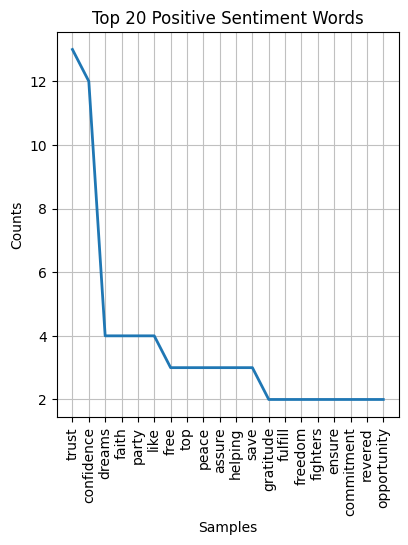

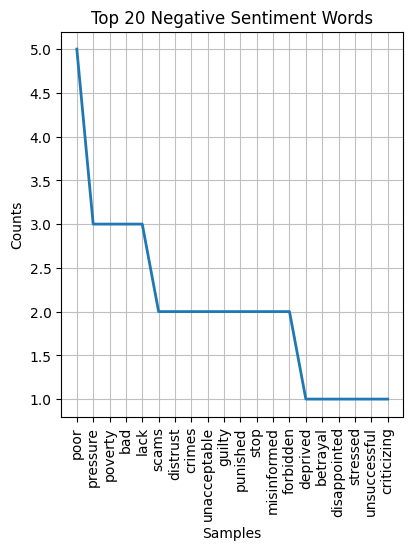

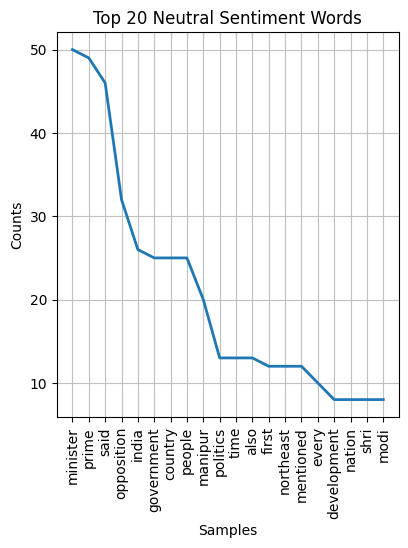

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(131)
word_freq_positive.plot(20,title="Top 20 Positive Sentiment Words")

plt.figure(figsize=(15,5))
plt.subplot(131)
word_freq_negative.plot(20,title="Top 20 Negative Sentiment Words")

plt.figure(figsize=(15,5))
plt.subplot(131)
word_freq_neutral.plot(20,title="Top 20 Neutral Sentiment Words")

plt.tight_layout()
plt.show()

In [ ]:
df_positive =pd.DataFrame(word_freq_positive.most_common(20),columns=['Word',"Frequency"])
df_negative =pd.DataFrame(word_freq_negative.most_common(20),columns=['Word',"Frequency"])
df_neutral =pd.DataFrame(word_freq_neutral.most_common(20),columns=['Word',"Frequency"])


In [ ]:
df_positive

,Word,Frequency
0,trust,13
1,confidence,12
2,dreams,4
3,faith,4
4,party,4
5,like,4
6,free,3
7,top,3
8,peace,3
9,assure,3


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_positive, *['Frequency'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_positive, *['Frequency'], **{})
chart

In [ ]:
df_negative

,Word,Frequency
0,poor,5
1,pressure,3
2,poverty,3
3,bad,3
4,lack,3
5,scams,2
6,distrust,2
7,crimes,2
8,unacceptable,2
9,guilty,2


In [ ]:
df_neutral

,Word,Frequency
0,minister,50
1,prime,49
2,said,46
3,opposition,32
4,india,26
5,government,25
6,country,25
7,people,25
8,manipur,20
9,politics,13


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_neutral, *['Frequency'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_neutral, *['Frequency'], **{})
chart

In [ ]:
fig_positive =px.bar(df_positive,x='Word',y="Frequency",title="Top 20 Positive Sentiment Words")
fig_negative =px.bar(df_negative,x='Word',y="Frequency",title="Top 20 Positive Sentiment Words")
fig_neutral =px.bar(df_neutral,x='Word',y="Frequency",title="Top 20 Positive Sentiment Words")

fig_positive.show()

In [ ]:
fig_negative.show()

In [ ]:
fig_neutral.show()

In [ ]:
wordcloud_positive=WordCloud(width=800,height=600,background_color='white').generate_from_frequencies(word_freq_positive)
wordcloud_negative=WordCloud(width=800,height=600,background_color='blue').generate_from_frequencies(word_freq_negative)
wordcloud_neutral=WordCloud(width=800,height=600,background_color='black').generate_from_frequencies(word_freq_neutral)

Text(0.5, 1.0, 'neutral Sentiment Words')

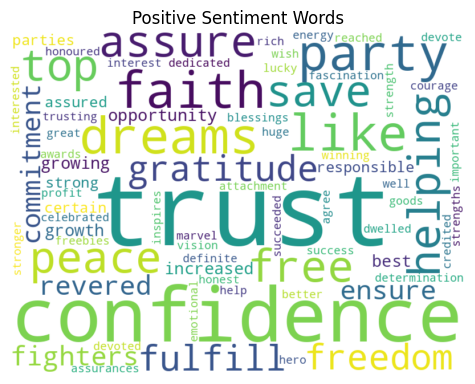

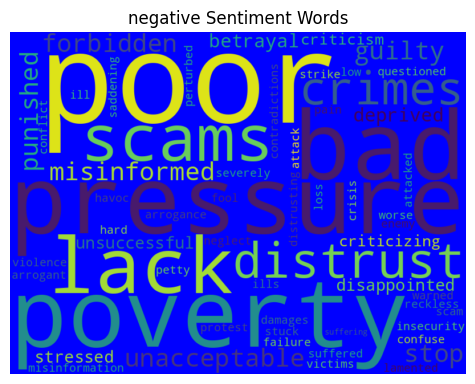

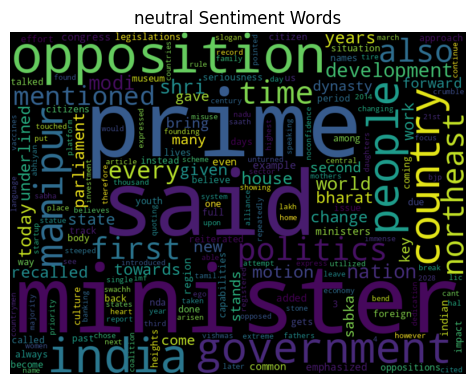

In [ ]:
plt.figure(figsize=(20,20))

plt.subplot(131)
plt.imshow(wordcloud_positive,interpolation='bilinear')
plt.axis('off')
plt.title("Positive Sentiment Words")

plt.figure(figsize=(20,20))

plt.subplot(132)
plt.imshow(wordcloud_negative,interpolation='bilinear')
plt.axis('off')
plt.title("negative Sentiment Words")


plt.figure(figsize=(20,20))

plt.subplot(133)
plt.imshow(wordcloud_neutral,interpolation='bilinear')
plt.axis('off')
plt.title("neutral Sentiment Words")

# Conclusion:

In conclusion, our project successfully accomplished the task of sentiment analysis on the provided text corpus. We meticulously categorized words into their respective sentiment categories: positive, negative, and neutral. Through Python programming and the NLTK library, we efficiently extracted and analyzed sentiment words, gaining a deeper understanding of the emotional context within the text.

Our findings revealed the prevalence of specific sentiment words, highlighting the dominant emotional tones expressed in the text. This information can be leveraged for a wide range of applications, including sentiment-aware content creation, targeted marketing strategies, and data-informed decision-making.

As we conclude this project, it is evident that sentiment analysis remains a vital tool in the realm of natural language processing, enabling us to decode human emotions and opinions embedded in textual data, ultimately aiding organizations and individuals in making more informed choices.